# Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood 
for important automotive innovations. These include the passenger safety cell with a 
crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies 
for nearly 2000 patents per year, making the brand the European leader among premium 
carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection 
of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit 
the road, the company’s engineers have developed a robust testing system. As one of the 
world’s biggest manufacturers of premium cars, safety and efficiency are paramount on 
Mercedes-Benz’s production lines. However, optimizing the speed of their testing system 
for many possible feature combinations is complex and time-consuming without a powerful 
algorithmic approach.

I am required to reduce the time that cars spend on the test bench. Others will work 
with a dataset representing different permutations of features in a Mercedes-Benz car 
to predict the time it takes to pass testing. Optimal algorithms will contribute to 
faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s 
standards.

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import and visualize the dataset
df_train = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(4209, 378)

In [6]:
test_df.shape

(4209, 377)

In [7]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test_df.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Removing the columns with zero variance
def zero_var_cols(df):
    df_var = pd.DataFrame(df.var(),columns=['Variance'])
    return(list(df_var[df_var.Variance==0].index))
zero_var_cols(df_train)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [10]:
df_var = pd.DataFrame(df_train.var(),columns=['Variance'])
df_train.drop(columns=list(df_var[df_var.Variance==0].index),inplace=True)
df_train.shape

(4209, 366)

In [11]:
#Checking for null and unique values
df_train.isnull().any()

ID      False
y       False
X0      False
X1      False
X2      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 366, dtype: bool

In [12]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

In [13]:
test_df.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [14]:
df_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [15]:
test_df.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

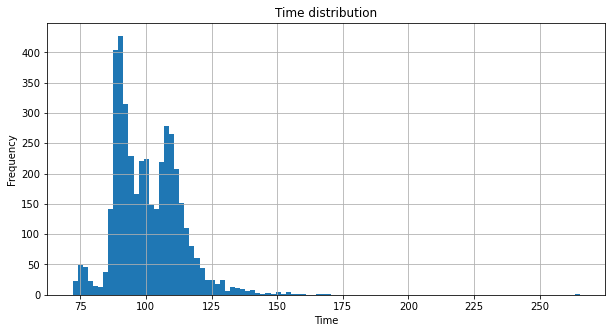

In [16]:
plt.figure(figsize=(10,5))
df_train.y.hist(bins=100)
plt.title('Time distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [17]:
#Apply label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df_train.drop(columns='y')
y = df_train.y

In [18]:
X.shape,y.shape

((4209, 365), (4209,))

In [19]:
feat_cols = df_train.select_dtypes(include='object').columns

def feat_labels(df,X):
    feat_cols = df.select_dtypes(include='object').columns
    for i in feat_cols:
        le.fit(X[i])
        X[i]=le.transform(X[i])
        
feat_labels(df_train,X)
X.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Perform dimensionality reduction PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=110)
pca.fit(X)

PCA(n_components=110)

In [21]:
pca.explained_variance_

array([5.94196565e+06, 2.03975269e+02, 1.13710313e+02, 6.50118891e+01,
       4.90200476e+01, 3.91561657e+01, 8.46520331e+00, 3.95652406e+00,
       2.30742283e+00, 1.56287733e+00, 1.28466070e+00, 1.25732867e+00,
       1.08159181e+00, 8.87939164e-01, 7.87709311e-01, 6.83971234e-01,
       5.50619435e-01, 5.09454205e-01, 4.75621565e-01, 4.18146531e-01,
       3.77550097e-01, 3.42658921e-01, 3.30892165e-01, 3.10837978e-01,
       2.72696604e-01, 2.56953876e-01, 2.29991795e-01, 2.20266666e-01,
       2.00881027e-01, 1.95830151e-01, 1.89321241e-01, 1.75220136e-01,
       1.67370361e-01, 1.59472080e-01, 1.50075487e-01, 1.42391709e-01,
       1.32112134e-01, 1.17791049e-01, 1.14079324e-01, 1.10026247e-01,
       1.04569539e-01, 9.91096080e-02, 9.48673340e-02, 9.35638782e-02,
       9.28330213e-02, 8.98421574e-02, 8.12976629e-02, 7.95362586e-02,
       7.64899801e-02, 7.52442765e-02, 7.35220508e-02, 7.10200997e-02,
       6.89271693e-02, 6.70378133e-02, 6.34954892e-02, 6.09954099e-02,
      

In [22]:
pca.explained_variance_ratio_

array([9.99915408e-01, 3.43250074e-05, 1.91351988e-05, 1.09402163e-05,
       8.24910539e-06, 6.58920898e-06, 1.42452645e-06, 6.65804820e-07,
       3.88293669e-07, 2.63001372e-07, 2.16183012e-07, 2.11583571e-07,
       1.82010530e-07, 1.49422616e-07, 1.32555912e-07, 1.15098844e-07,
       9.26583708e-08, 8.57310762e-08, 8.00377113e-08, 7.03657987e-08,
       6.35342210e-08, 5.76627256e-08, 5.56826130e-08, 5.23078897e-08,
       4.58894501e-08, 4.32402600e-08, 3.87030746e-08, 3.70665275e-08,
       3.38043076e-08, 3.29543449e-08, 3.18590240e-08, 2.94860866e-08,
       2.81651246e-08, 2.68359999e-08, 2.52547391e-08, 2.39617111e-08,
       2.22318617e-08, 1.98219061e-08, 1.91972961e-08, 1.85152433e-08,
       1.75969872e-08, 1.66781887e-08, 1.59642978e-08, 1.57449519e-08,
       1.56219631e-08, 1.51186598e-08, 1.36807903e-08, 1.33843807e-08,
       1.28717522e-08, 1.26621249e-08, 1.23723084e-08, 1.19512794e-08,
       1.15990806e-08, 1.12811393e-08, 1.06850362e-08, 1.02643222e-08,
      

In [23]:
pca.components_

array([[ 9.99997515e-01, -7.34609541e-05,  2.99568235e-04, ...,
        -1.56006132e-07, -1.37295095e-07,  4.49823896e-07],
       [-8.25418421e-05, -9.31138475e-01,  2.44312134e-01, ...,
         3.33638024e-06, -9.30807937e-06, -3.01954607e-05],
       [ 1.10694145e-04,  2.65106027e-01, -1.34229841e-02, ...,
        -9.46573002e-05, -7.35049264e-07, -7.50666635e-06],
       ...,
       [-2.89002678e-06,  7.32914527e-05, -3.96198700e-03, ...,
         3.37976187e-03,  6.22648959e-03, -3.56777781e-02],
       [-7.63260288e-07, -3.05995520e-04,  2.73382699e-05, ...,
         3.17726570e-03, -1.30395161e-03, -1.82603145e-03],
       [ 1.19416223e-06, -1.10999217e-04, -4.62397310e-04, ...,
        -1.17884030e-02,  1.00625384e-02, -1.83293128e-02]])

In [24]:
X = pd.DataFrame(pca.transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,-4205.923425,0.862446,-0.181561,13.142941,2.322514,19.812601,-2.754408,4.097243,1.644002,-0.496511,...,0.166895,-0.123482,-0.256747,-0.122688,-0.038853,-0.000526,0.178979,0.579438,0.766963,0.355833
1,-4199.915452,0.784414,1.630118,11.348872,2.752782,23.799197,-4.515199,-0.481383,0.925189,-0.620209,...,-0.101845,-0.325051,0.133145,-0.002266,0.125402,-0.158890,-0.088738,-0.118908,0.184579,0.165911
2,-4198.917131,16.435270,12.328816,11.419325,13.012691,22.552714,-2.225194,1.134341,1.693690,-0.429674,...,0.747527,0.206453,-0.116878,-0.016382,0.397130,-0.060636,-0.216863,0.076682,0.597688,-0.518040
3,-4196.918465,16.389727,13.542439,7.031012,-5.636712,23.339277,-4.360409,-1.921483,2.207257,0.220142,...,-0.039461,-0.002354,-0.139390,-0.087400,0.003090,-0.403024,-0.019974,0.223050,0.141979,-0.113152
4,-4192.950637,16.814246,12.718698,9.909809,2.400921,8.051290,3.724607,-1.781797,2.165019,1.291574,...,0.059980,-0.005661,-0.018482,-0.149968,0.200269,-0.168494,0.045141,-0.113622,0.094234,-0.178922


In [25]:
#Predict your test_df values using XGBoost
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=42)
xgb=XGBRegressor(max_depth=4, min_child_weight=5, reg_lambda=10, gamma = 100)
xgb.fit(x_train,y_train)

[12:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=100, max_depth=4, min_child_weight=5, reg_lambda=10)

In [27]:
pred = xgb.predict(x_test)
pred

array([ 90.07937,  93.86677, 111.44642, ..., 101.38624, 112.06812,
        87.73643], dtype=float32)

In [28]:
print('The model accuracy is: {}'.format(xgb.score(x_train,y_train)))

The model accuracy is: 0.8202533357077924


In [29]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
sqrt(mean_squared_error(y_test, pred))

9.231481207859815

In [30]:
print('R2 Value/Coefficient of Determination is: {}'.format(xgb.score(x_test, y_test)))

R2 Value/Coefficient of Determination is: 0.4806265265983145


In [31]:
Prediction = pd.DataFrame({'Target':y_test, 'Prediction':pred})
Prediction.head(10)

,Target,Prediction
1073,97.94,90.079369
144,96.41,93.866768
2380,105.83,111.446419
184,79.09,79.292679
2587,108.69,110.655403
2768,94.60,99.584572
3697,84.48,94.077736
999,110.24,100.131973
2856,120.80,102.278023
2862,122.66,109.416664


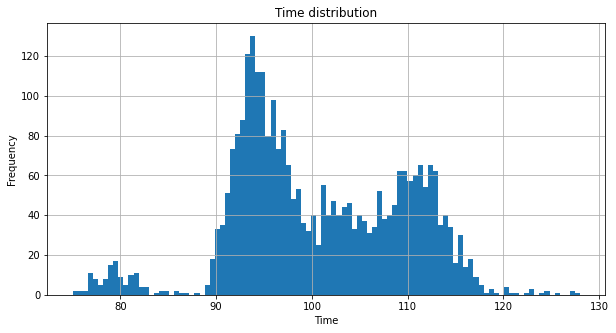

In [32]:
plt.figure(figsize=(10,5))
Prediction.Prediction.hist(bins=100)
plt.title('Time distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [33]:
zero_var_cols(test_df)

['X257', 'X258', 'X295', 'X296', 'X369']

In [34]:
test_df.drop(columns=['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347'],inplace=True)
test_df.shape

(4209, 365)

In [35]:
X_f = test_df.drop(columns=['ID'])
feat_labels(test_df,X_f)
X_f.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
pca.fit(X_f)
X_f = pd.DataFrame(pca.transform(X_f))
X_f.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,14.583362,14.166726,13.538576,2.408357,11.319422,6.942207,-2.026132,2.533692,-1.082240,0.549662,...,-0.119988,0.172554,0.153264,0.182508,0.052183,0.349964,-0.011020,0.060924,-0.199569,-0.208601
1,-15.251613,-7.736756,-7.454951,-2.662035,11.593793,1.159403,4.006845,1.839730,0.600353,0.352251,...,-0.064110,0.010008,0.108358,0.070312,0.080499,0.155768,-0.039525,0.120451,-0.047642,-0.059311
2,11.856465,-1.680173,-9.989615,14.918866,-1.088860,-2.691306,-0.904760,0.736433,-0.079942,0.635885,...,0.188262,0.011835,-0.126294,-0.176937,0.004127,-0.075410,0.216310,0.024804,-0.097487,-0.123891
3,12.606882,13.871583,14.143968,-8.224170,1.683162,-3.704102,-2.549438,2.039046,0.292179,0.400601,...,-0.204247,0.164404,0.086012,0.101360,0.064952,0.149714,-0.233906,0.028721,-0.056813,-0.050873
4,-11.897597,2.735944,18.424166,5.053374,0.359333,-1.415911,0.831165,-3.044068,1.359959,-0.424771,...,0.038035,0.097324,0.071762,-0.008254,-0.147146,-0.071628,0.076202,-0.044985,-0.025362,-0.009113


In [37]:
test_pred = pd.DataFrame(xgb.predict(X_f),columns=['y'])
test_pred['ID'] = test_df.ID
test_pred.head(10)

,y,ID
0,103.459976,1
1,91.914688,2
2,101.094185,3
3,109.782379,4
4,100.899109,5
5,100.268082,8
6,118.321548,10
7,103.446388,11
8,94.890144,12
9,99.086670,14


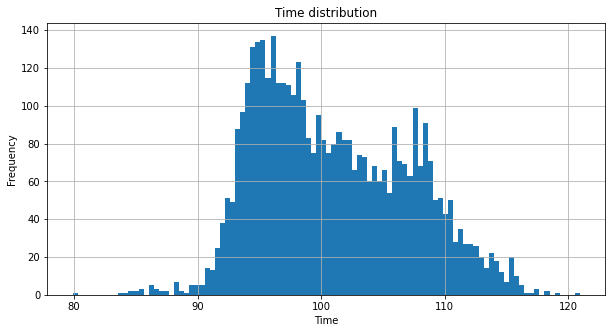

In [38]:
plt.figure(figsize=(10,5))
test_pred.y.hist(bins=100)
plt.title('Time distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [39]:
test_pred.tail(10)

,y,ID
4199,105.339500,8401
4200,101.106888,8404
4201,93.447205,8407
4202,92.546684,8408
4203,106.339203,8409
4204,95.468063,8410
4205,92.771378,8411
4206,94.711411,8413
4207,95.620468,8414
4208,93.456894,8416


In [40]:
test_pred.to_csv('test_df_predicted.csv',index=False)